# Milestone2
1. Build and test your method chain(s)
2. Wrap your method chain(s) in a function


- Step 3

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

data ='../../data/raw/Gamesales.csv'
dfu = unprocessed(data)
dfu

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
dfp = load_and_process(data)
dfp

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Darksiders,X360,2010.0,Action,THQ,0.67,0.28,0.01,0.10,1.06,83.0,81.0,7.9,292.0,Vigil Games,M
1,Frogger 3D,3DS,2011.0,Action,Konami Digital Entertainment,0.16,0.03,0.00,0.01,0.21,54.0,11.0,5.5,8.0,Alpha Unit,E
2,BeyBlade VForce: Super Tournament Battle,GC,2002.0,Action,Atari,0.16,0.04,0.00,0.01,0.21,33.0,6.0,7.5,18.0,Takara,E
3,Power Rangers: Wild Force,GBA,2002.0,Action,THQ,0.15,0.05,0.00,0.00,0.21,55.0,4.0,6.9,8.0,Natsume,E
4,Tenchu: Shadow Assassins,Wii,2008.0,Action,Ubisoft,0.15,0.01,0.03,0.01,0.21,70.0,35.0,7.8,24.0,Acquire,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,Commandos 2: Men of Courage,XB,2002.0,Strategy,Eidos Interactive,0.05,0.02,0.00,0.00,0.07,67.0,12.0,8.4,5.0,Pyro Studios,T
6821,Wrath Unleashed,PS2,2004.0,Strategy,LucasArts,0.04,0.03,0.00,0.01,0.07,64.0,25.0,6,6.0,Double Helix Games,T
6822,Kessen III,PS2,2004.0,Strategy,Tecmo Koei,0.04,0.03,0.00,0.01,0.07,73.0,26.0,8.1,20.0,Koei,T
6823,Cities XL 2012,PC,2011.0,Strategy,Focus Home Interactive,0.01,0.05,0.00,0.01,0.07,61.0,18.0,5.6,95.0,Monte Cristo Multimedia,E


In [3]:
dfp.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,6825.0,2007.436777,4.211248,1985.00,2004.00,2007.00,2011.00,2016.00
NA_Sales,6825.0,0.394484,0.967385,0.00,0.06,0.15,0.39,41.36
EU_Sales,6825.0,0.236089,0.687330,0.00,0.02,0.06,0.21,28.96
JP_Sales,6825.0,0.064158,0.287570,0.00,0.00,0.00,0.01,6.50
Other_Sales,6825.0,0.082677,0.269871,0.00,0.01,0.02,0.07,10.57
Global_Sales,6825.0,0.777590,1.963443,0.01,0.11,0.29,0.75,82.53
Critic_Score,6825.0,70.272088,13.868572,13.00,62.00,72.00,80.00,98.00
Critic_Count,6825.0,28.931136,19.224165,3.00,14.00,25.00,39.00,113.00
User_Count,6825.0,174.722344,587.428538,4.00,11.00,27.00,89.00,10665.00


In [4]:
dfp.describe(include=[np.object]).T

,count,unique,top,freq
Name,6825,4377,Madden NFL 07,8
Platform,6825,17,PS2,1140
Genre,6825,12,Action,1630
Publisher,6825,262,Electronic Arts,944
User_Score,6825,89,7.8,294
Developer,6825,1289,EA Canada,149
Rating,6825,7,T,2377


In [5]:
dfp.groupby(by=["Genre"]).sum()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Genre,,,,,,,,,
Action,3273694.0,591.23,387.78,76.17,147.46,1203.16,110561.0,49234.0,329589.0
Adventure,497893.0,38.81,25.06,8.73,8.05,80.75,16401.0,6187.0,28463.0
Fighting,758692.0,136.39,60.50,27.85,25.14,249.95,26359.0,10914.0,25154.0
Misc,771047.0,222.05,120.46,33.22,40.41,416.26,25905.0,9534.0,12844.0
Platform,808555.0,193.60,108.56,43.09,32.53,377.80,28210.0,10794.0,46180.0
Puzzle,236825.0,33.50,24.04,14.98,6.33,78.90,8342.0,3372.0,4066.0
Racing,1165711.0,225.59,164.66,27.76,58.29,476.22,40405.0,15038.0,42849.0
Role-Playing,1429547.0,219.53,119.20,122.47,40.36,501.37,51848.0,23526.0,235821.0
Shooter,1734593.0,448.76,261.12,18.57,87.90,816.48,61328.0,32067.0,339028.0


In [6]:


df2 = (dfp.groupby(by=["Genre"])
       .sum()
       .drop(['Year_of_Release','Critic_Score' ,'Critic_Count', 'User_Count'],axis=1)
      )


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks",font_scale=1.3)


Text(0, 0.5, 'Sales')

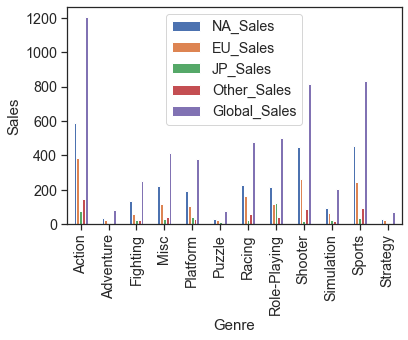

In [8]:

df2.plot.bar()
plt.xlabel('Genre',size=15)
plt.ylabel('Sales',size=15)


The figure shows that Action has the most global sales, and the least common genres in the world are adventure, puzzle, and strategy.

In [9]:
df3 =(
    df2.drop(['Global_Sales'], axis =1)
)

Text(0, 0.5, 'Sales')

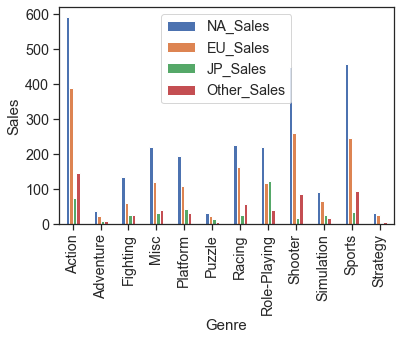

In [10]:
df3.plot.bar()
plt.xlabel('Genre',size=15)
plt.ylabel('Sales',size=15)


Text(0, 0.5, 'Count')

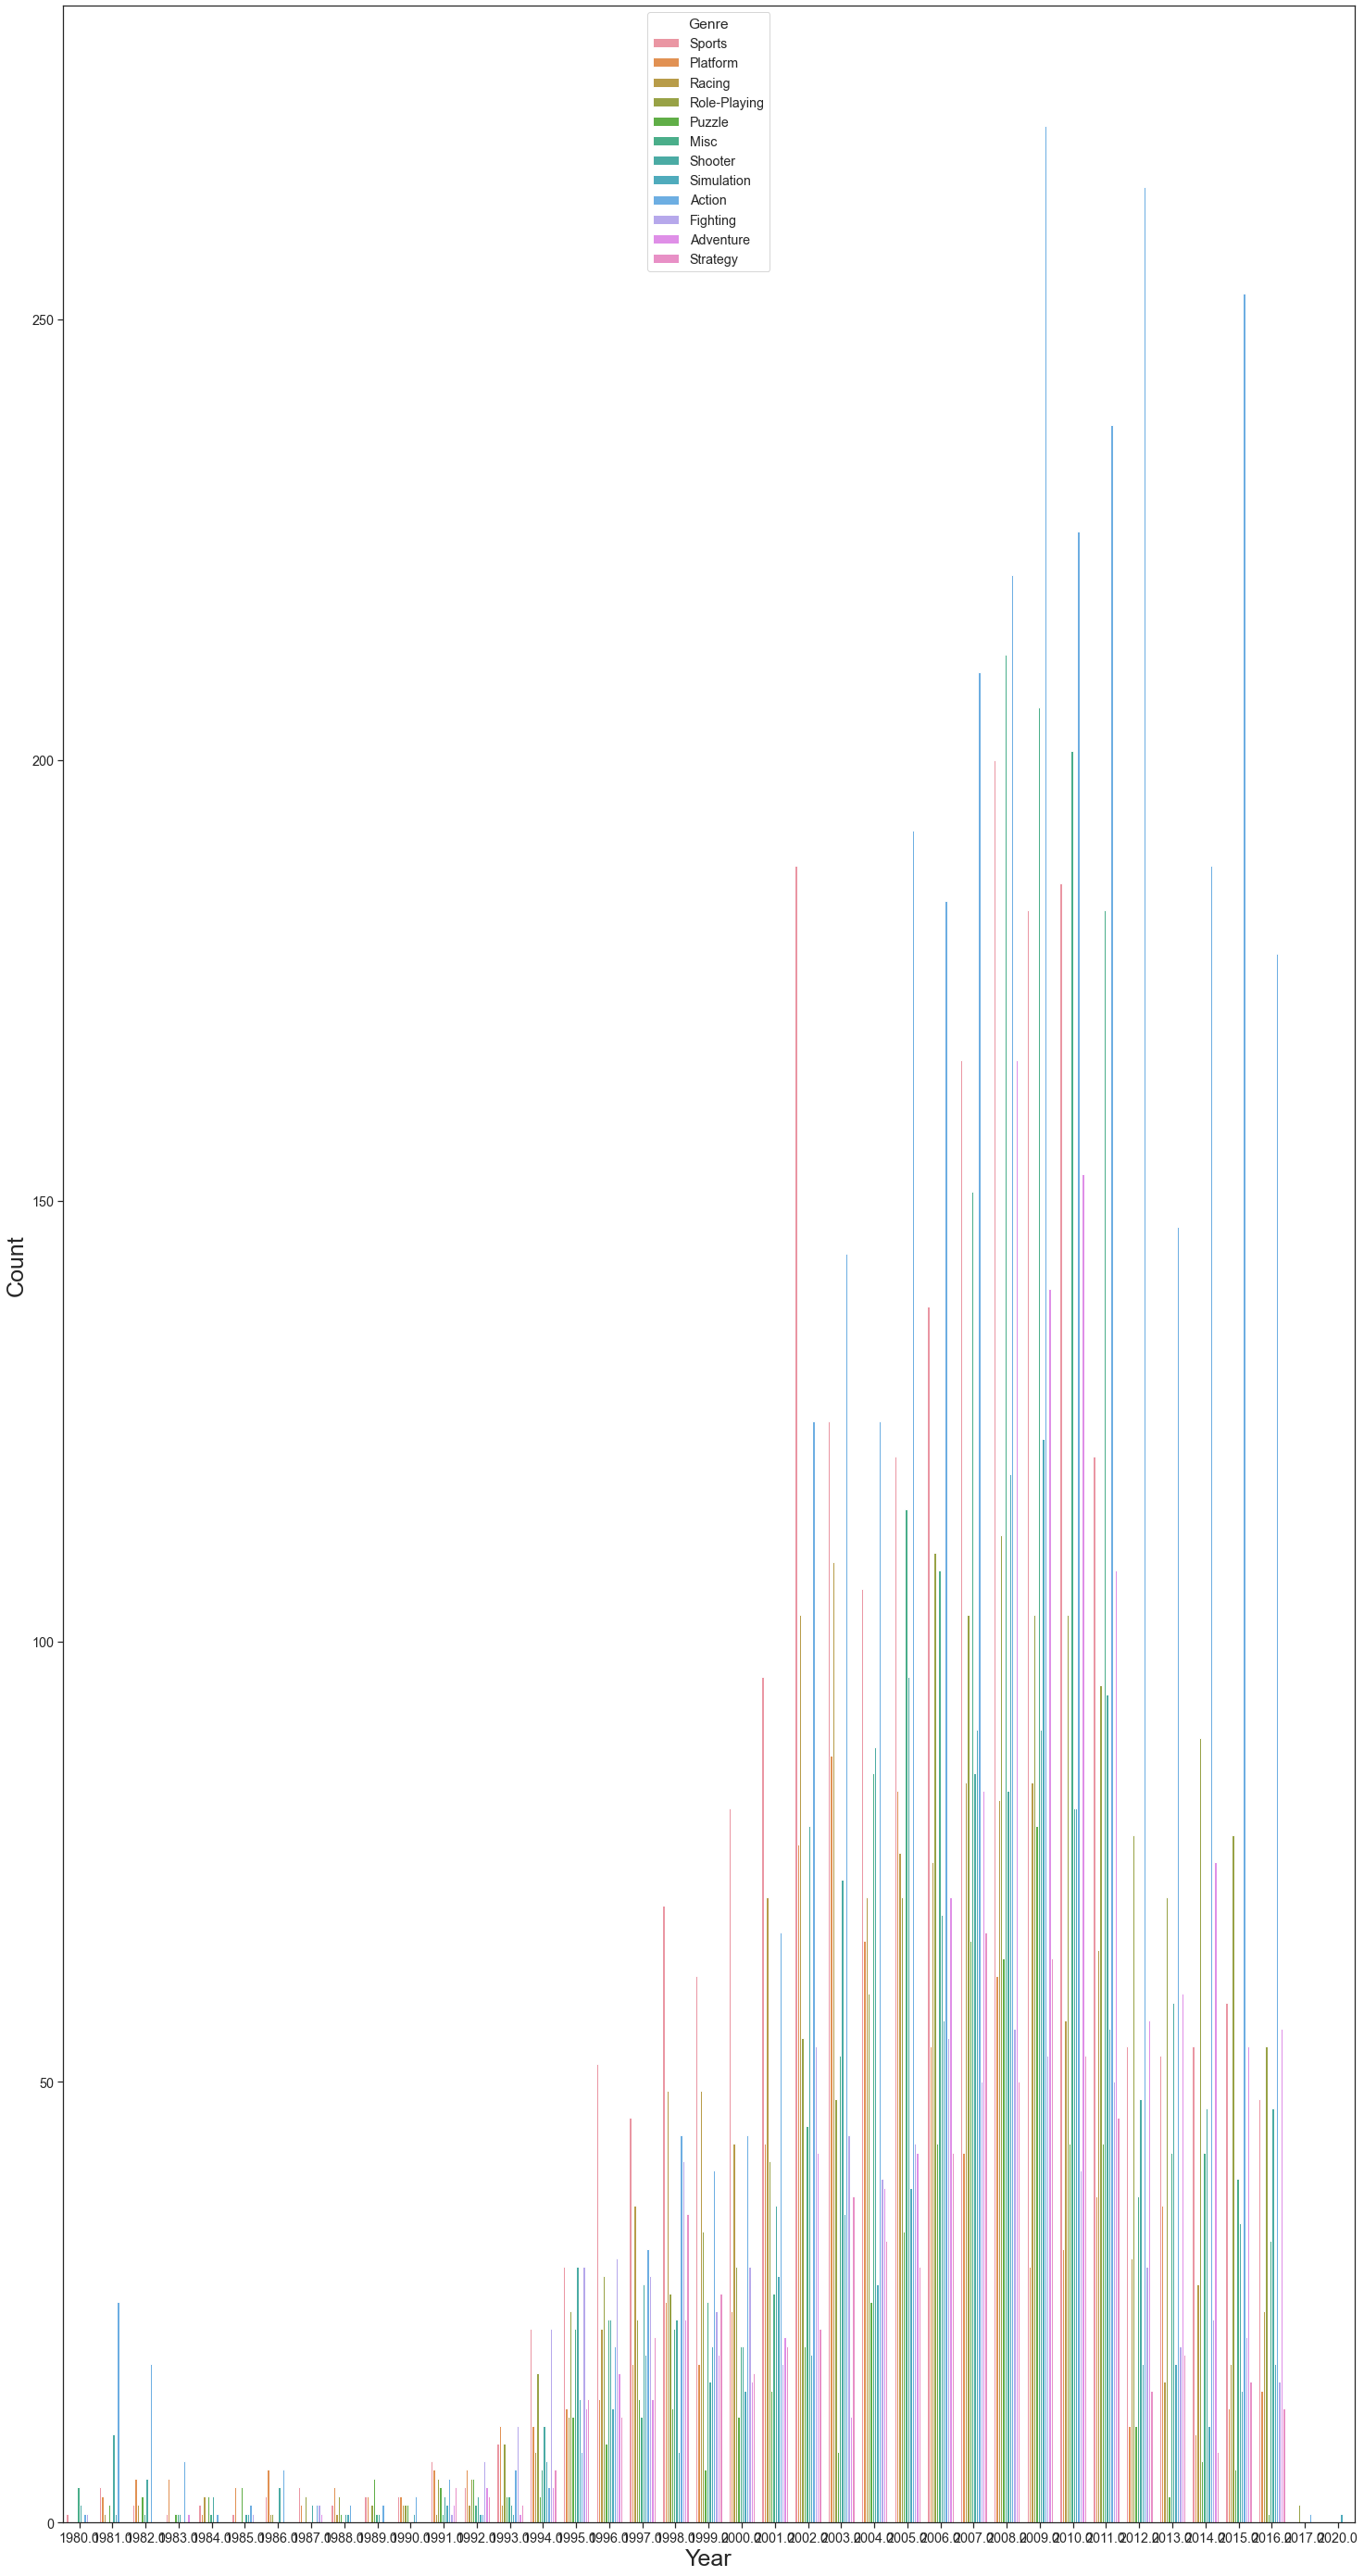

In [168]:
fig_dims = (25, 50)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Year_of_Release",data=df,ax =ax, hue = "Genre")
plt.xlabel('Year',size=25)
plt.ylabel('Count',size=25)


The The game sales is increasing.

<AxesSubplot:xlabel='count', ylabel='Genre'>

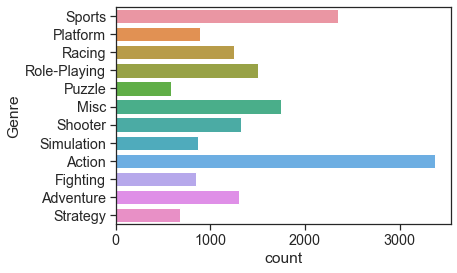

In [161]:
sns.countplot(y ='Genre' ,data = df)

Action is the most popular genre, and puzzle is not.